# Deep Learning: Ex.2 - Perceptron

Submitted by: [... Ran Ben Melech ...]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray' # set default colormap of plots

In [21]:
def gradient_descent_perceptron (X, y, alpha, epochs=100):
    eps = 1e-10 
    J = np.zeros(epochs) 
    N,d = X.shape
    w = np.zeros(d)    
    for t in range(epochs):
        z = X.dot(w) 
        g = 1 / (1+np.exp(-z))
        dw = np.dot(X.T,g-y) 
        w = w - alpha * dw
        J[t] = -np.sum(y*np.log(g+eps) + (1-y)*np.log(1-g+eps))
    return w, J

### Part I: 2-D Example


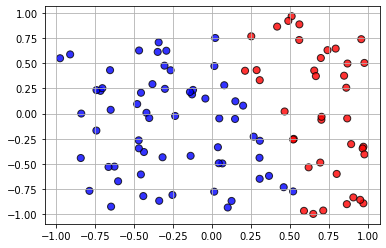

In [22]:
# 2-D example

def generate_data_2D (N=100):
    x = np.random.random((N,2))*2-1
    X = np.concatenate((np.ones((N,1)),x),axis=1);
    w = np.array([-1,3,1])*10
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y

x,y = generate_data_2D()

plt.scatter(x[:,0],x[:,1],s=50,c=y, cmap='bwr', alpha=0.8, edgecolor='k')
plt.grid()
plt.show()



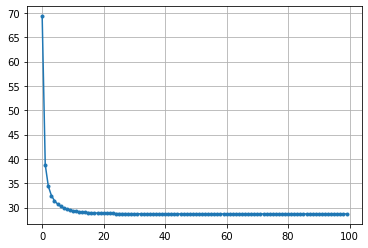

In [23]:
w,J = gradient_descent_perceptron(x,y, alpha=0.1, epochs=100)

plt.plot(J,'.-')
plt.grid()
plt.show()

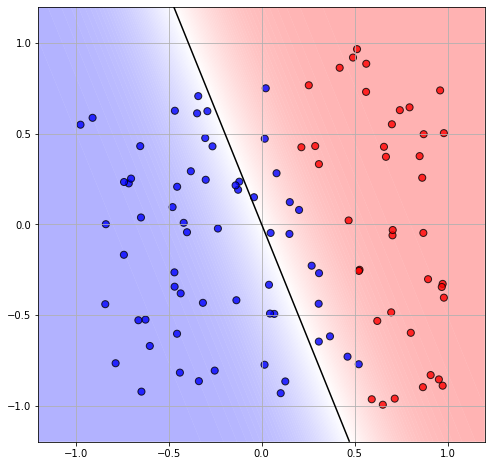

In [24]:
x1_set = np.linspace(-1.2,1.2,100) # from -1.2 to 1.2 in 100 steps
x2_set = np.linspace(-1.2,1.2,100)

X1,X2 = np.meshgrid(x1_set,x2_set)
Z = w[0]*X1 + w[1]*X2
G_grid = 1/(1+np.exp(-Z))
        
plt.figure(figsize=(8,8))
plt.contourf(x1_set,x2_set,G_grid, 100,alpha=0.3, cmap='bwr',antialiased=True,vmin=0,vmax=1)
plt.contour(x1_set,x2_set,G_grid, levels=[0.5], colors='black')
plt.scatter(x[:,0],x[:,1],s=50,c=y, cmap='bwr', alpha=0.8, edgecolor='k')
plt.grid()
plt.show()

- Plot the predicted values $\hat{y_i}$ of all the 100 samples $\{{\vec{x}}_i\}$
- Calculate the accuracy of the results: how many of the 100 samples classified correctly? 

Assume the predicted label is `1` if $\hat{y_i}>0.5$ and `0` otherwise.



The accuracy is: 0.85


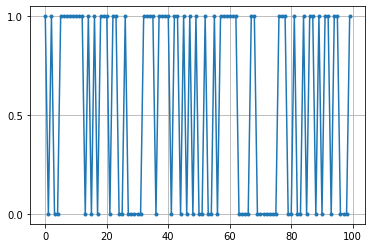

In [49]:
# place your code here.. 
def accCheck(x,w,y):
    accuracy=0
    counter=0
    trueCounter=0
    z = x.dot(w)
    yhat = 1 / (1+np.exp(-z))
    for i in np.nditer(yhat, op_flags = ['readwrite']):
        if i[...] <=0.5:
            i[...]=0
        else:
            i[...]=1
    plt.plot(yhat,'.-')
    plt.yticks([0,0.5,1])
    plt.grid()
    for j in range(len(yhat)):
        if yhat[j]==y[j]:
            trueCounter+=1
        counter+=1
    acc=trueCounter/counter
    print ("The accuracy is:",acc)
accCheck(x,w,y)

- How can you fix the classification results?

- Make the necessary change to the input matrix `x` to add a **bias** term to the perceptron (**why?**)

- Train the perceptron again, plot the results and calculate the accuracy.

In [26]:
# place your code here.. 
lst=list(x.shape)
toCopy=lst[-1]
lst[-1]+=1
shape=tuple(lst)
newX=np.zeros(shape)
newX[:,:toCopy]=x
newX[:,-1]=0.05
W1,J1=gradient_descent_perceptron(newX,y, alpha=0.1, epochs=10000)

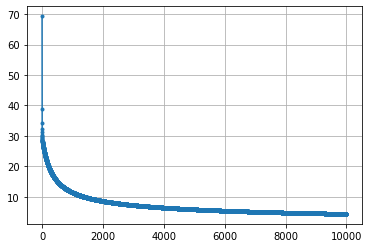

The accuracy is: 0.99


0

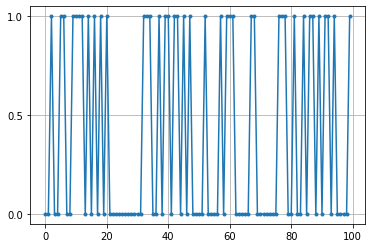

In [27]:
plt.plot(J1,'.-')
plt.grid()
plt.show()
accCheck(newX,W1,y)

### Part II: MNIST data



In [28]:
# load data
digits = cv2.imread('digits.png',0) 

# Now we split the image to 5000 cells, each 20x20 size
X = [np.hsplit(row,100) for row in np.vsplit(digits,50)]
X = np.array(X, dtype=float) # Shape = (50,100,20,20)
X /= 255 # normalize x in range [0,1]

X = np.reshape(X,[50*100,20*20]) # Shape = (5000,400)
Y = np.arange(10).repeat(500) # y = [0,0,0,.....,1,1,1,......,2,2,2,.....]

print('X.shape =',X.shape)
print('Y.shape =',Y.shape)

X.shape = (5000, 400)
Y.shape = (5000,)


#### Learn to classify "1"

- Train a perceptron to "recognize" the digit "1" (the perceptron should output `1` for this digit, and `0` for all the other digits)

- Calculate the accuracy level of the classifier (how many of the 5000 samples it classified correctly)

- Visualize the learned parameters $\vec{w}$ as a $20\times 20$ image (as we did in class)

X.shape = (500, 400)
Y.shape = (500,)


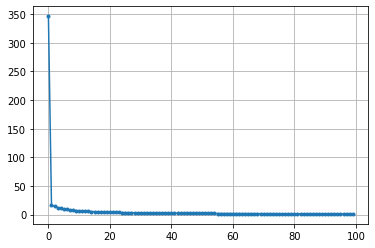

In [50]:
# place your code here.. 
mask = (Y==1)
X01 = X[mask,:]
Y01 = Y[mask]
print('X.shape =',X01.shape)
print('Y.shape =',Y01.shape)
W3,Jres = gradient_descent_perceptron(X01,Y01, alpha=0.001, epochs=100)
plt.plot(Jres,'.-')
plt.grid()


The accuracy is: 1.0


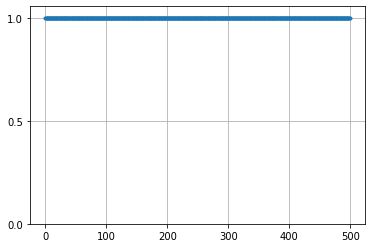

In [51]:
accCheck(X01,W3,Y01)

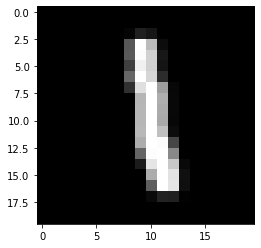

In [52]:
z=X01.dot(W3)
yhat = 1/(1+np.exp(-z))
toShow=np.where(yhat[:500]>0.5)
plt.imshow(X01[1,:].reshape(20,20))

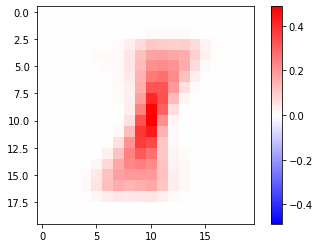

In [53]:
vm = np.max(np.abs(W3))
plt.imshow(W3.reshape(20,20),cmap='bwr',vmin=-vm,vmax=vm)
plt.colorbar()
plt.show()

#### Learn to classify "2"

- Repeat the same analysis, but this time train it to "recognize" the digit "2" (the perceptron should output `1` for this digit, and `0` for all the other digits)

- Calculate the accuracy level of the classifier (how many of the 5000 samples it classified correctly)

- Visualize the learned parameters $\vec{w}$ as a $20\times 20$ image (as we did in class)

X.shape = (500, 400)
Y.shape = (500,)


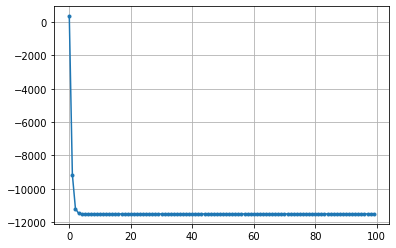

In [57]:
# place your code here.. 
mask1 = (Y==2)
X02 = X[mask1,:]
Y02 = Y[mask1]
print('X.shape =',X02.shape)
print('Y.shape =',Y02.shape)
W4,Jres2 = gradient_descent_perceptron(X02,Y02, alpha=0.001, epochs=100)
plt.plot(Jres2,'.-')
plt.grid()




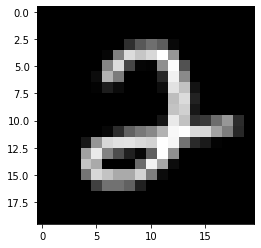

In [59]:
z=X02.dot(W4)
yhat = 1/(1+np.exp(-z))
toShow=np.where(yhat[:500]>0.5)
plt.imshow(X02[1,:].reshape(20,20))

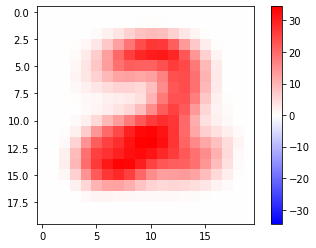

In [43]:
vm = np.max(np.abs(W4))
plt.imshow(W4.reshape(20,20),cmap='bwr',vmin=-vm,vmax=vm)
plt.colorbar()
plt.show()